# Sales prediction

loading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\Internship_Project\Sales\Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df.shape

(200, 4)

# Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

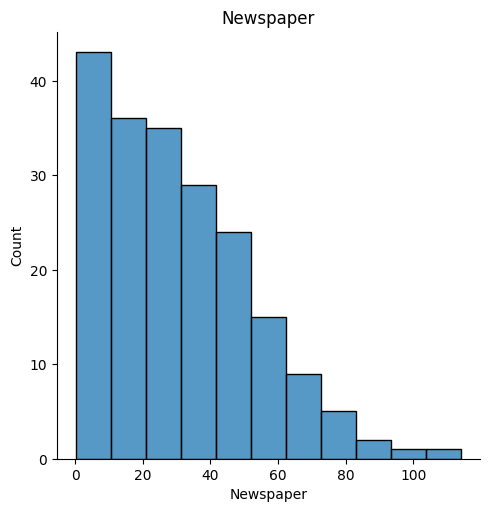

In [11]:
sns.displot(df["Newspaper"])
plt.title("Newspaper")
plt.show()

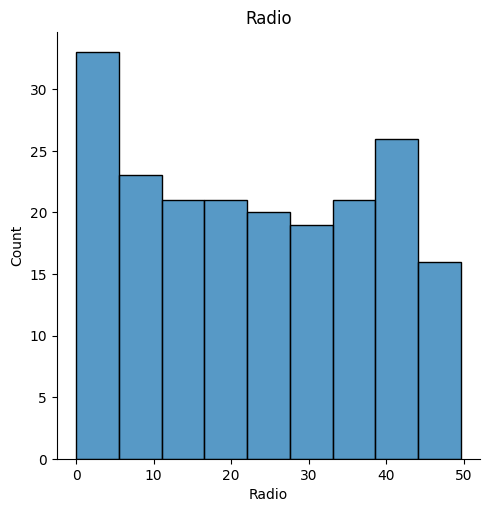

In [12]:
sns.displot(df["Radio"])
plt.title("Radio")
plt.show()


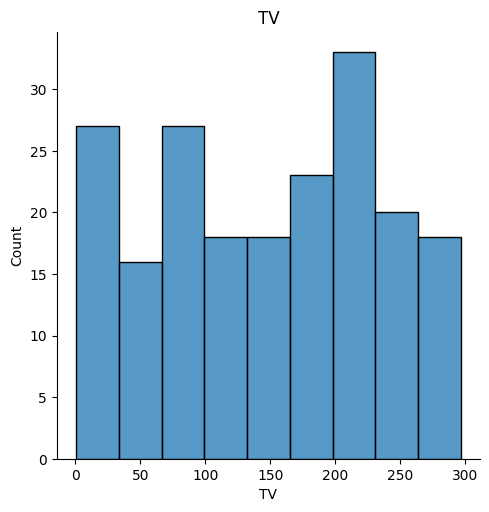

In [13]:
sns.displot(df["TV"])
plt.title("TV")
plt.show()

In [14]:
df.sample(5)

,TV,Radio,Newspaper,Sales
91,28.6,1.5,33.0,7.3
112,175.7,15.4,2.4,14.1
153,171.3,39.7,37.7,19.0
22,13.2,15.9,49.6,5.6
138,43.0,25.9,20.5,9.6


In [15]:
X = df.drop(["Sales"],axis=1)

In [16]:
y = df.Sales

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
X_train.shape

(160, 3)

In [19]:
y_train.shape

(160,)

In [20]:
X_test.shape

(40, 3)

In [21]:
y_test.shape

(40,)

# Regression model building Using LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

# Accuracy

In [25]:
lr.score(X_test,y_test)

0.899438024100912

# predicted value

In [26]:
pred = lr.predict(X_test)
pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [27]:
y_test[:10]

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
Name: Sales, dtype: float64

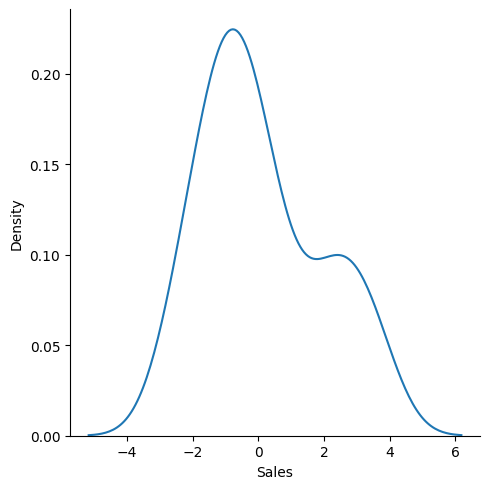

In [28]:
sns.displot(pred-y_test,kind='kde')

# Calculating r2_score

In [29]:
from sklearn.metrics import r2_score

In [30]:
score = r2_score(pred,y_test)

In [31]:
score

0.8791069137120033

# Regression model using RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

# Accuracy

In [33]:
rf.score(X_test,y_test)

0.9822316810803586

# Predicted value

In [34]:
pred = rf.predict(X_test)

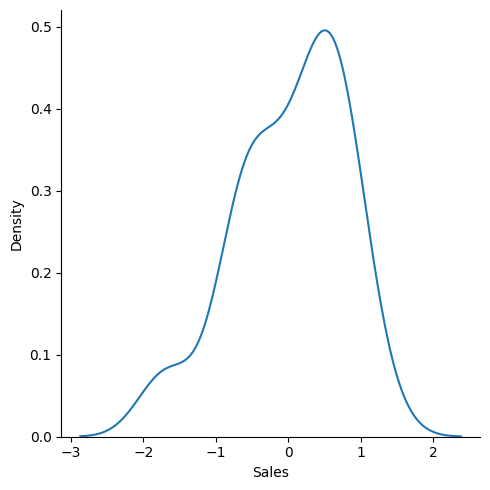

In [35]:
sns.displot(pred-y_test,kind='kde')

# R2_score

In [36]:
score = r2_score(pred,y_test)

In [37]:
score

0.9811787068904773